# [블록체인 프로그래밍 Week2]
* 이더리움 네트워크 망을 개설할 수 있다.
* 네트워크 망에 접속하여 클라이언트를 개설할 수 있다

--------
### <과제> 
* 'Code/학번/' 디렉토리와 그 하위 디렉토리를 구성하고, 화면 출력 제출
* 'solc --version'을 실행하여, 설치된 버전을 출력하고 화면 출력 제출
* 'geth -h'로 geth의 도움말을 출력하고 화면 출력 제출
* 메인네트워크 접속하고 'admin.nodeInfo' 출력하고, 화면출력 제출
* 테스트네트워크 접속하고 'admin.nodeInfo' 출력하고, 화면출력 제출
* 사설망 개설한 (로그가 출력되는) 화면출력 제출
* 사설망 계정을 생성하고, 충전한 후, 잔액을 출력한 화면출력 제출

##### [과제 1. Code/학번/ 디렉토리와 그 하위 디렉토리 구성]
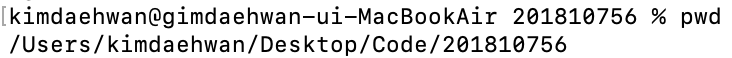

##### [과제 2. 'solc --version' 실행 후 버전 출력 및 화면 출력]
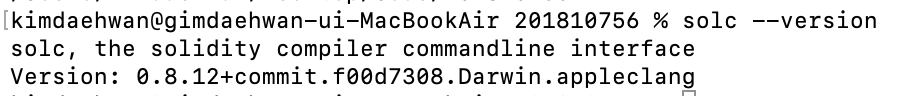

##### [과제 3. 'geth -h' 화면 출력(geth의 도움말)]
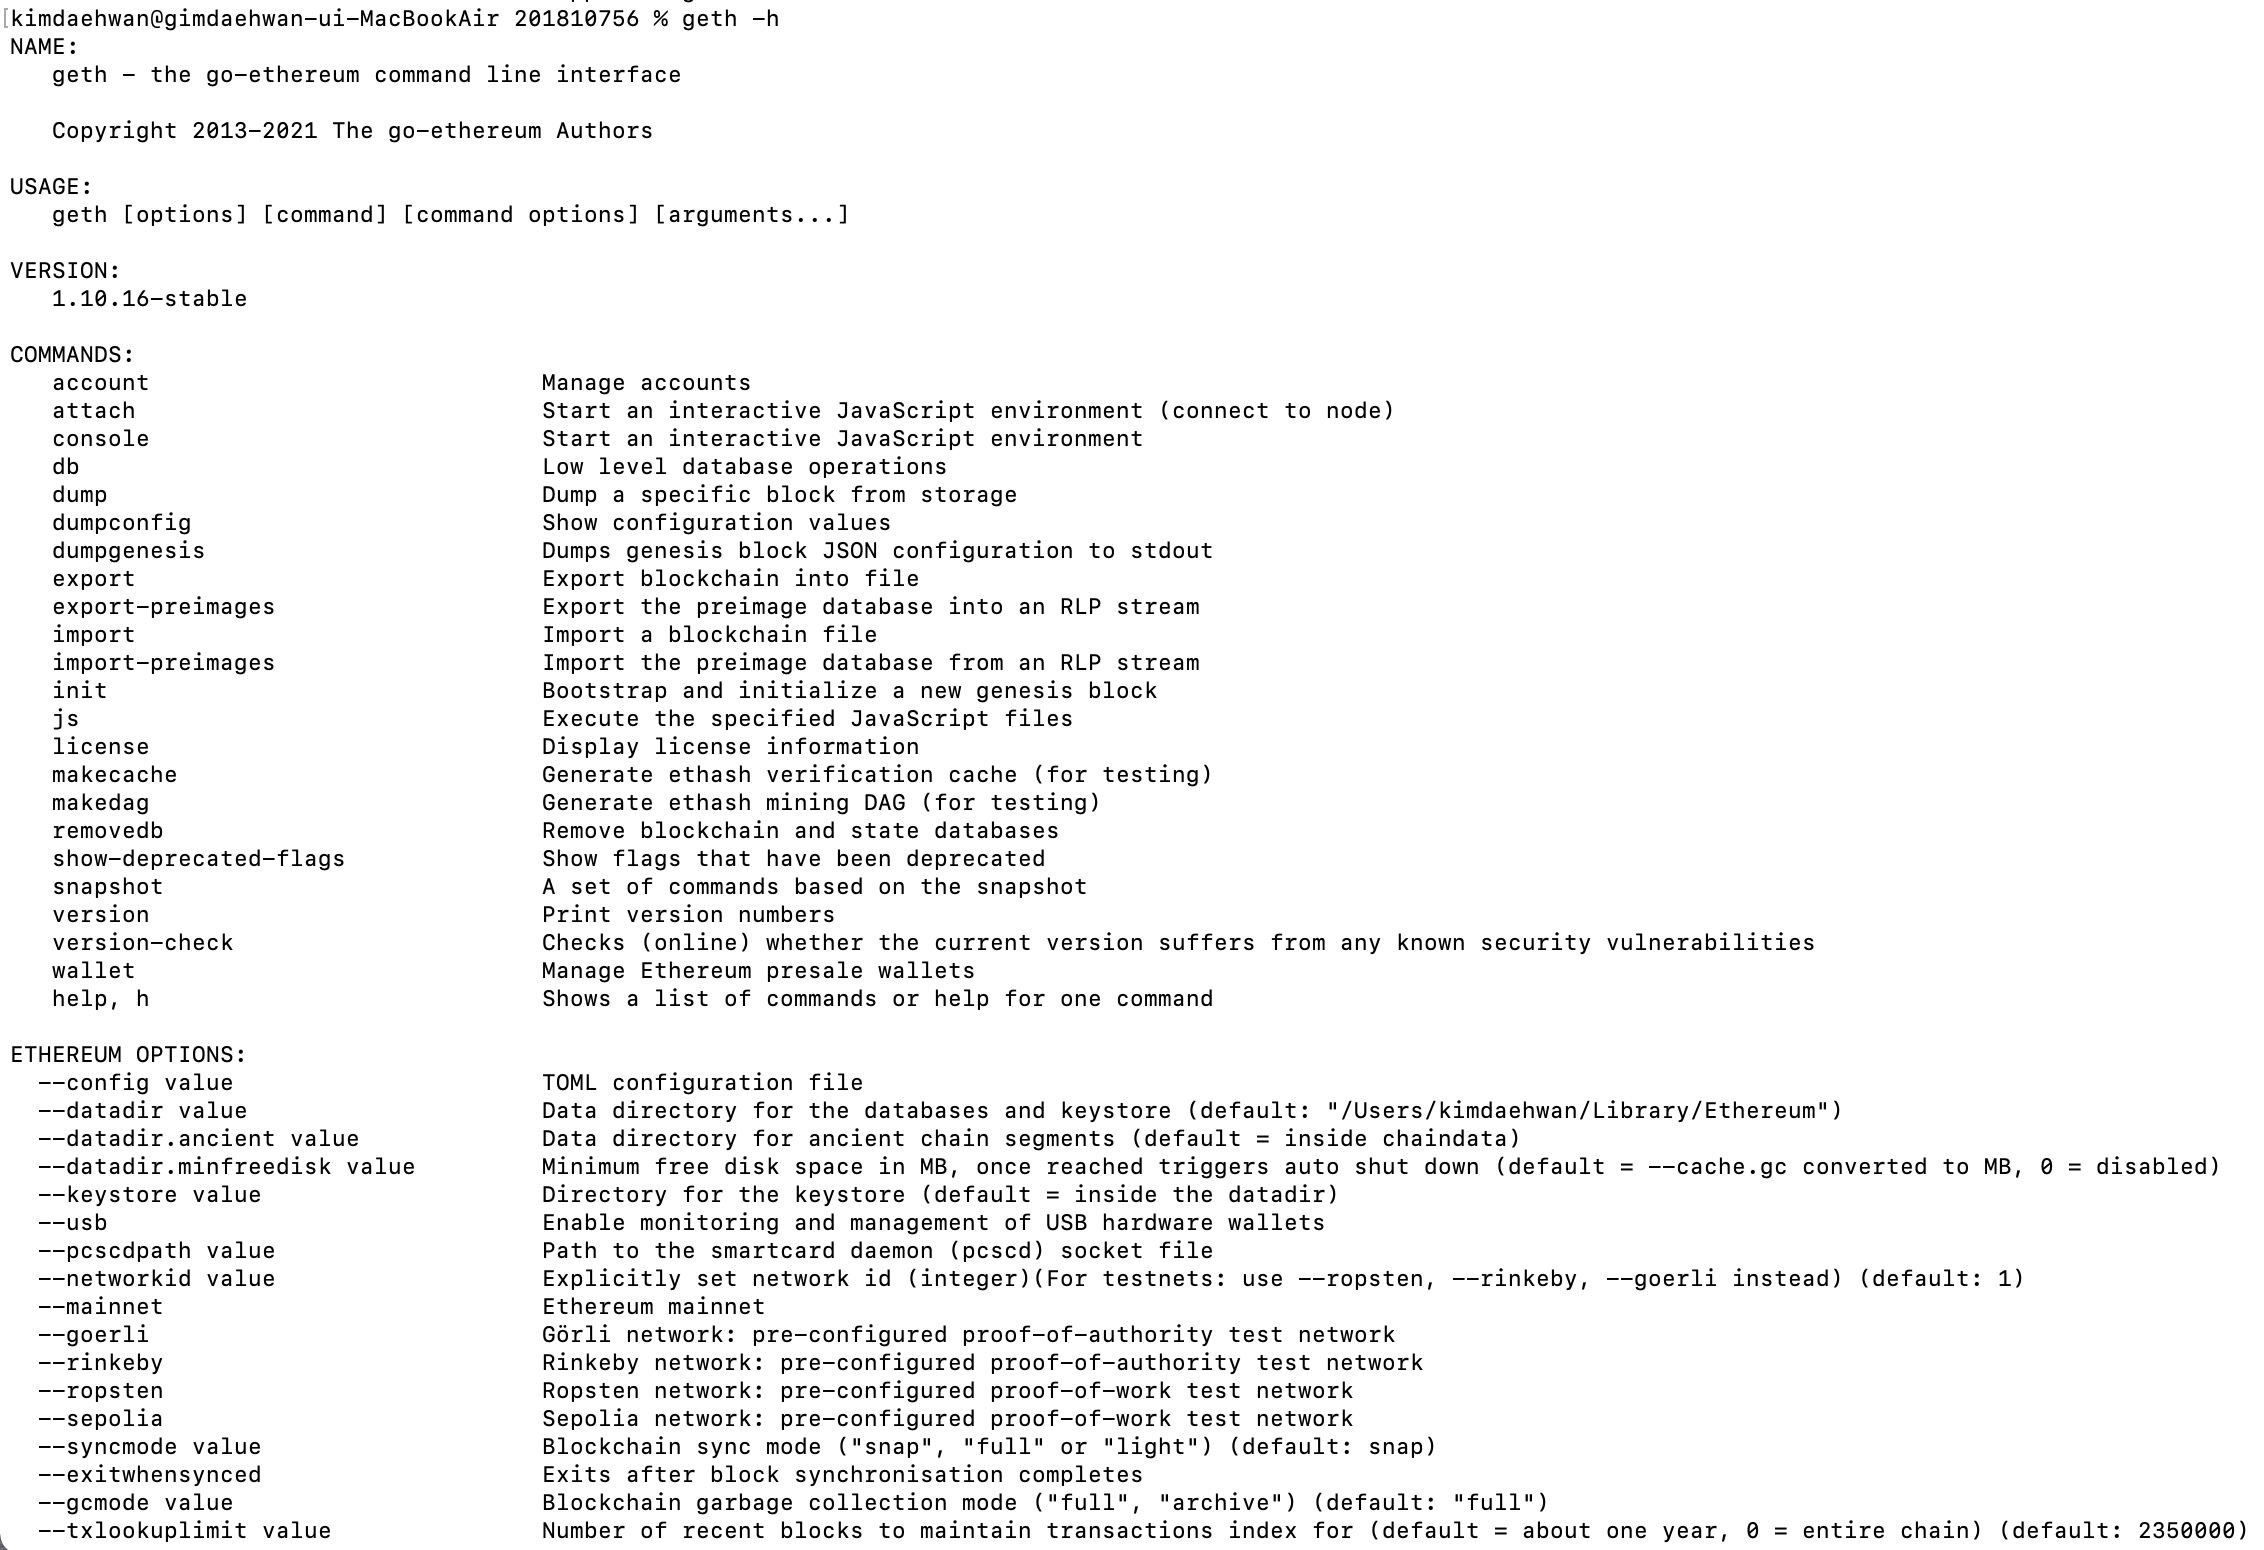

블록체인 네트워크는 분산 P2P로 실행 -> **개방성**에 따라 구분됨.
* 공중망 (Public Network) : 누구나 참여,사용 가능 
* 사설망 (Private Network) : 특정 개인이 개설, 참여가 제한 
* 연합망 

#### [공중망-메인네트워크]
```python
geth --syncmode fast --cache=1024
```
결과
```python
invalid value "fast" for flag -syncmode: unknown sync mode "fast", want "full", "snap" or "light"
``` 
위와 같은 오류 발생
따라서 
```python
geth --syncmode light --cache=1024
```
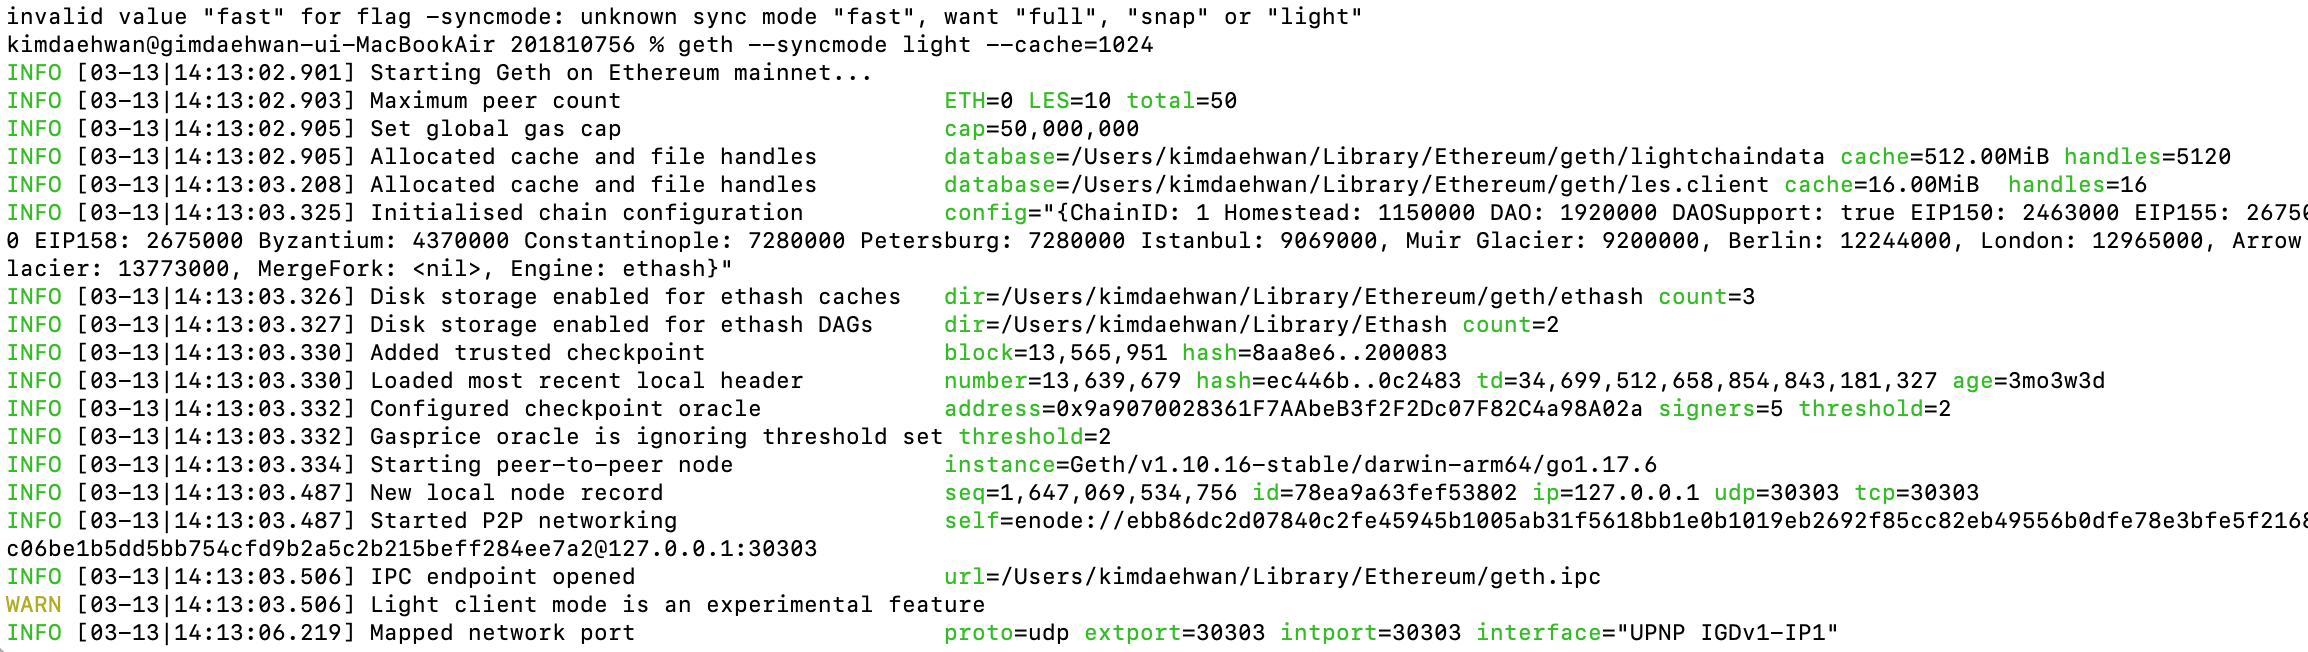

#### [공중망-테스트네트워크]
테스트 네트워크는 메인 네트워크의 복사본으로 볼 수 있다.
```python
geth --testnet
```
나의 환경에서는
```python
flag provided but not defined: -testnet
```
와 같은 오류 발생 
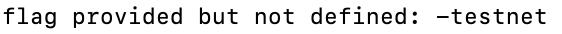

도움말에서 찾아보니 test network 진입을 위해서는 
```python
geth --goerli
```
명령어를 사용하는 것 같다.

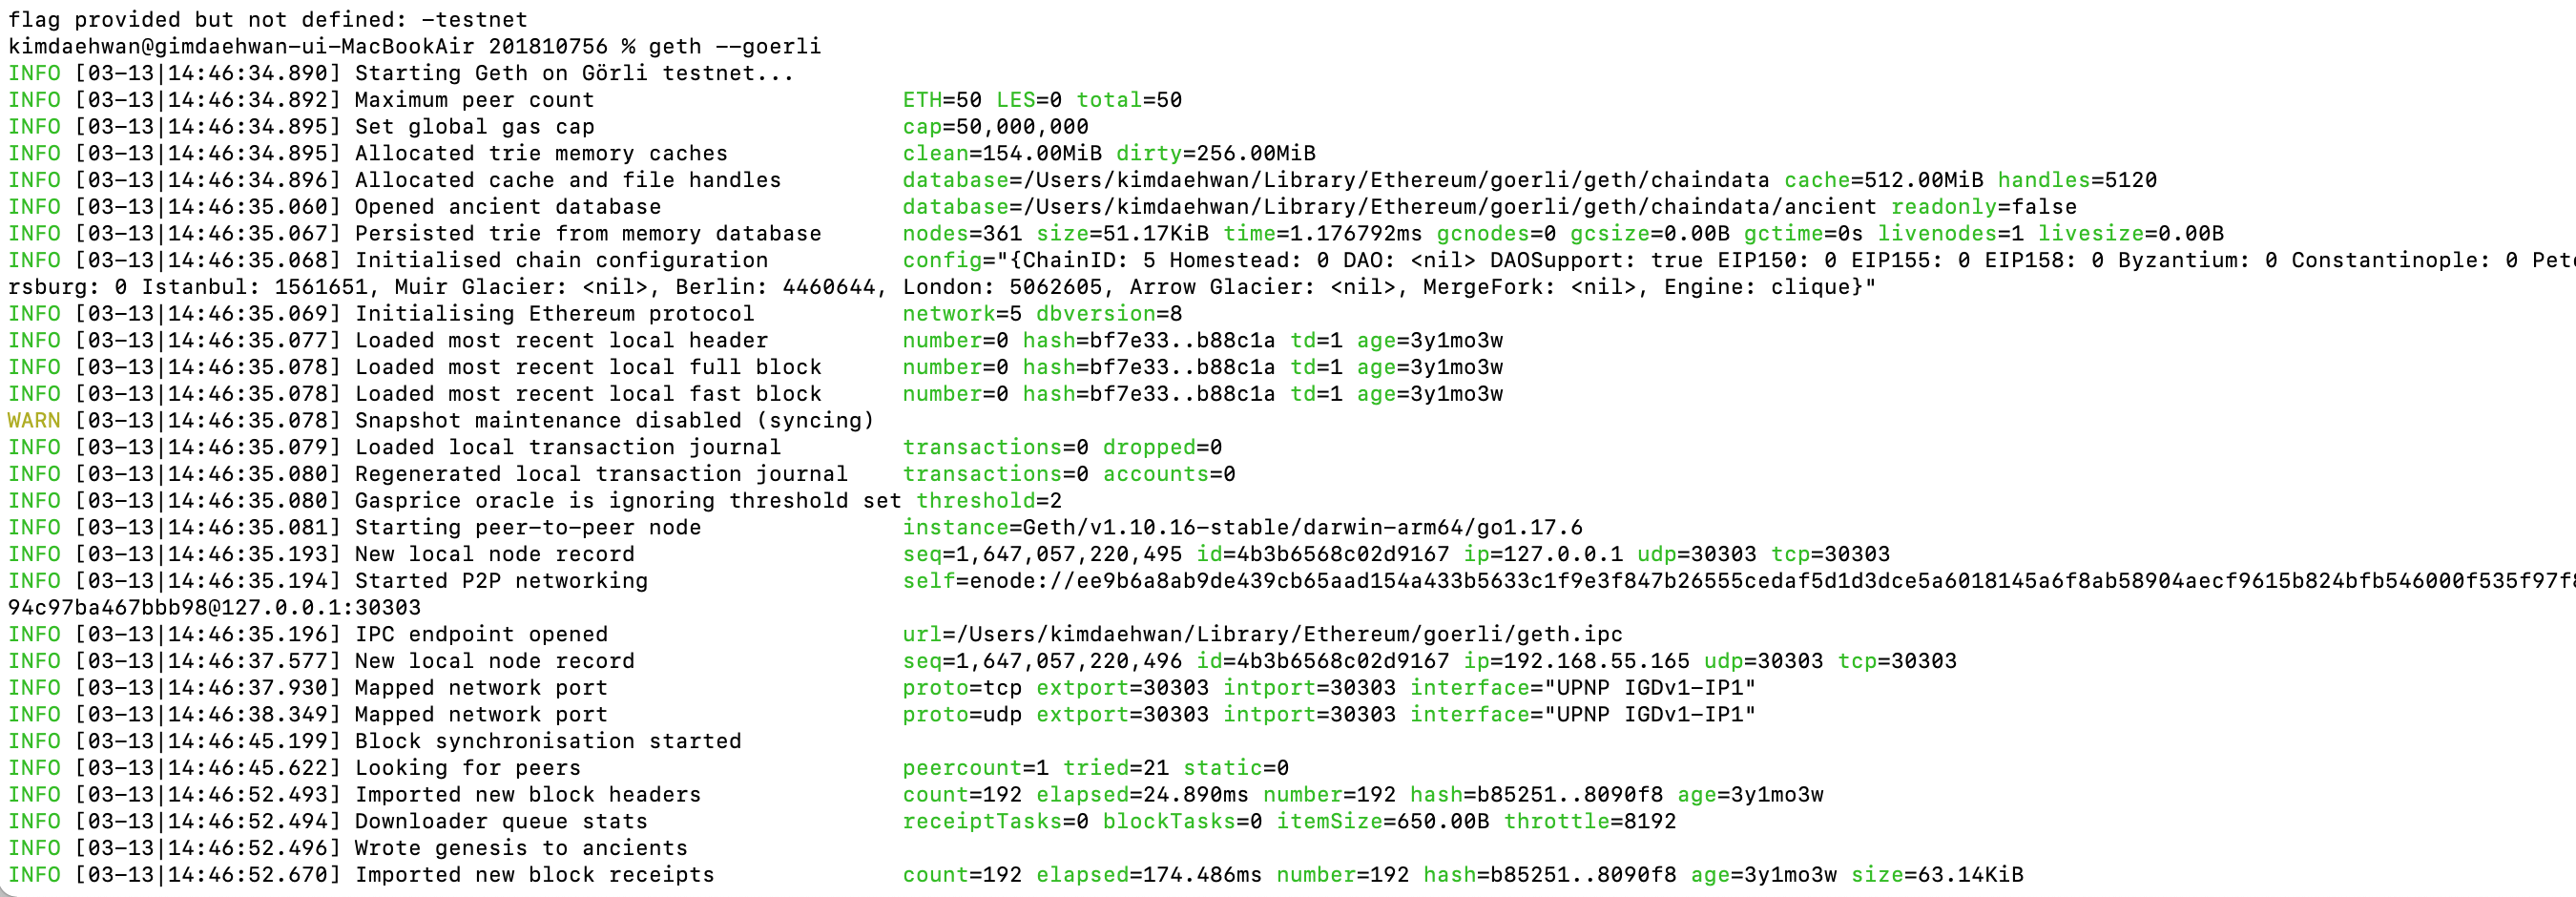

##### [과제4. 메인네트워크 'admin.nodeInfo' 출력
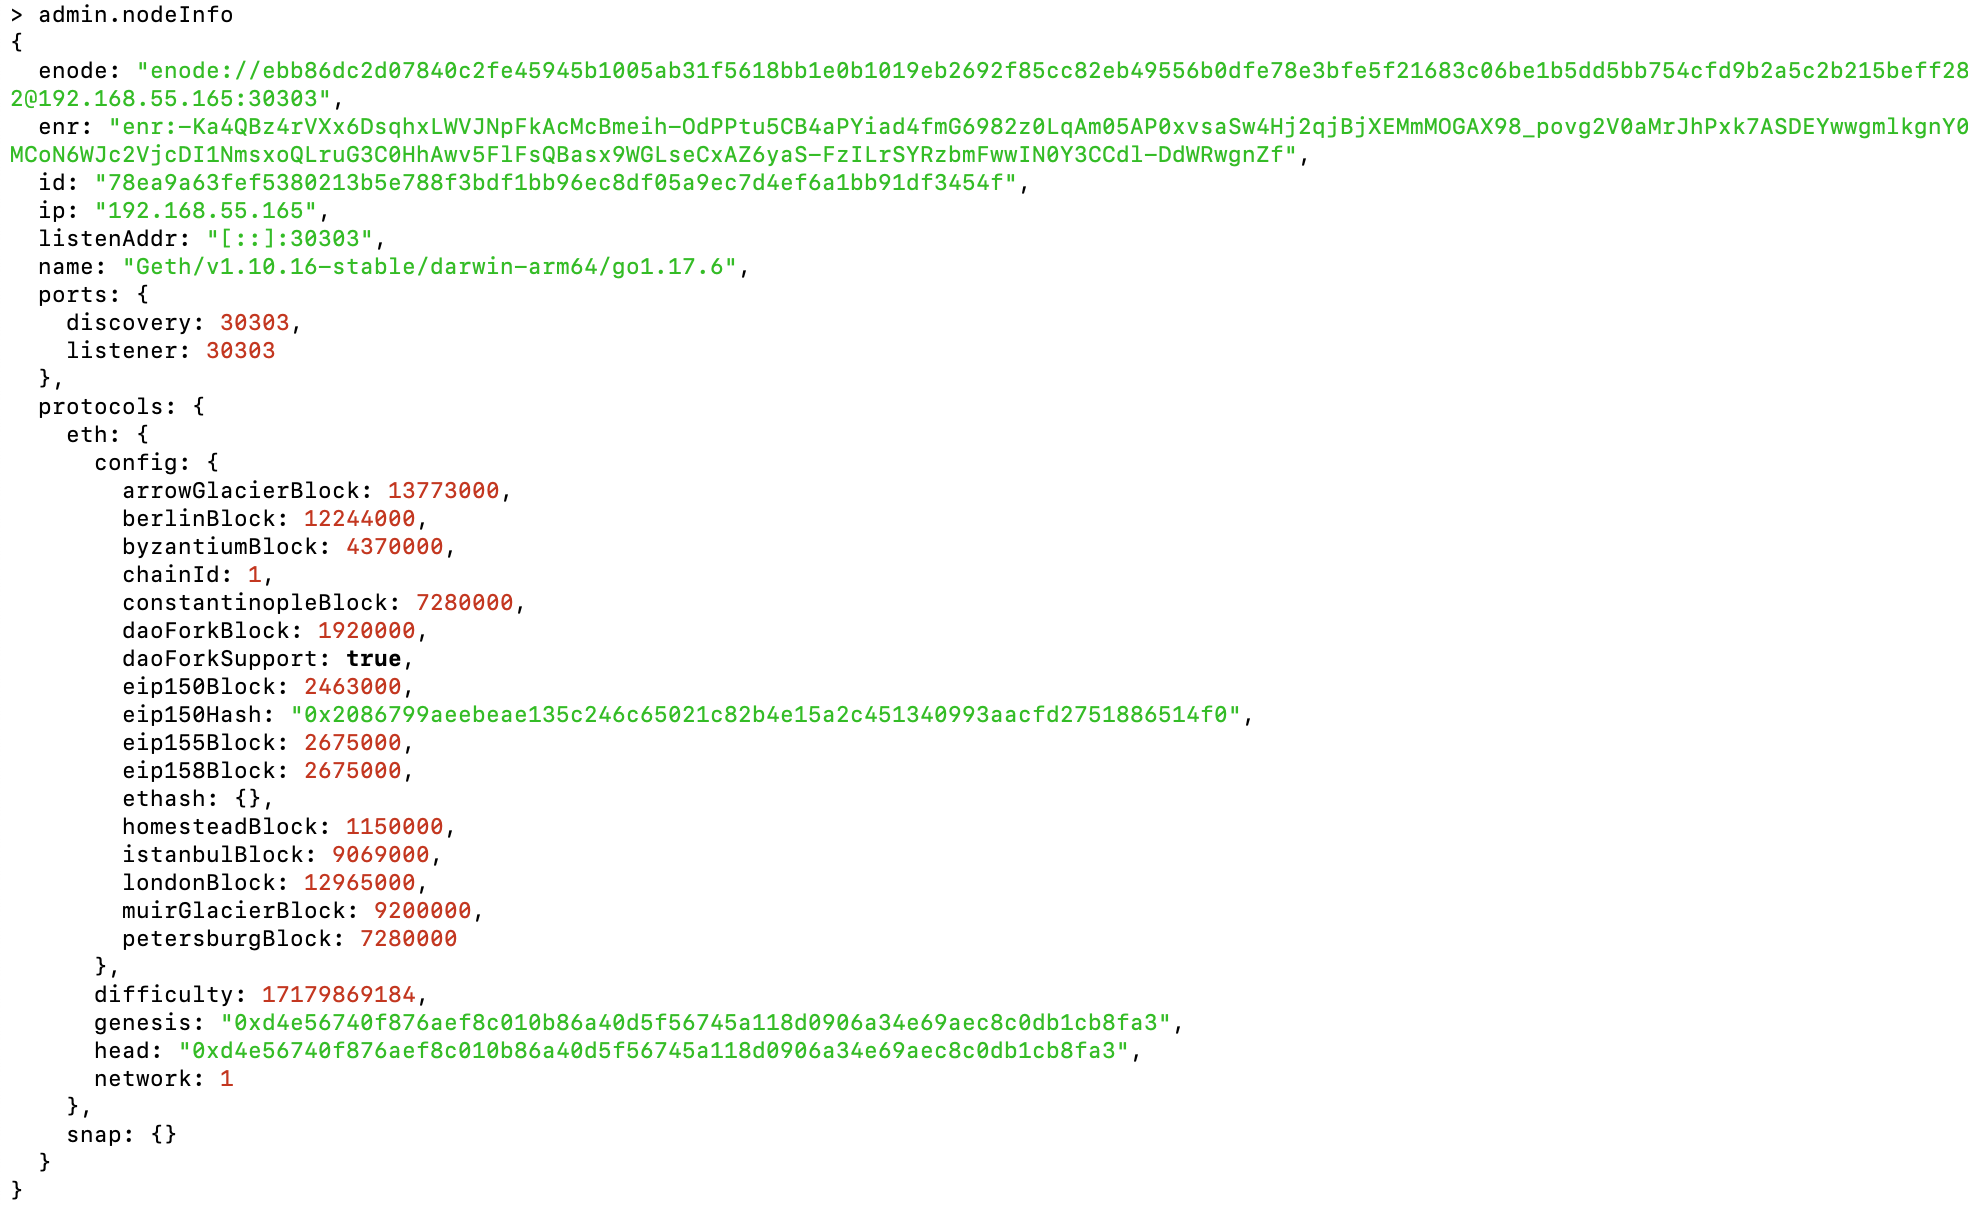

##### [과제 5. 테스트 네트워크 'admin.nodeInfo' 출력]
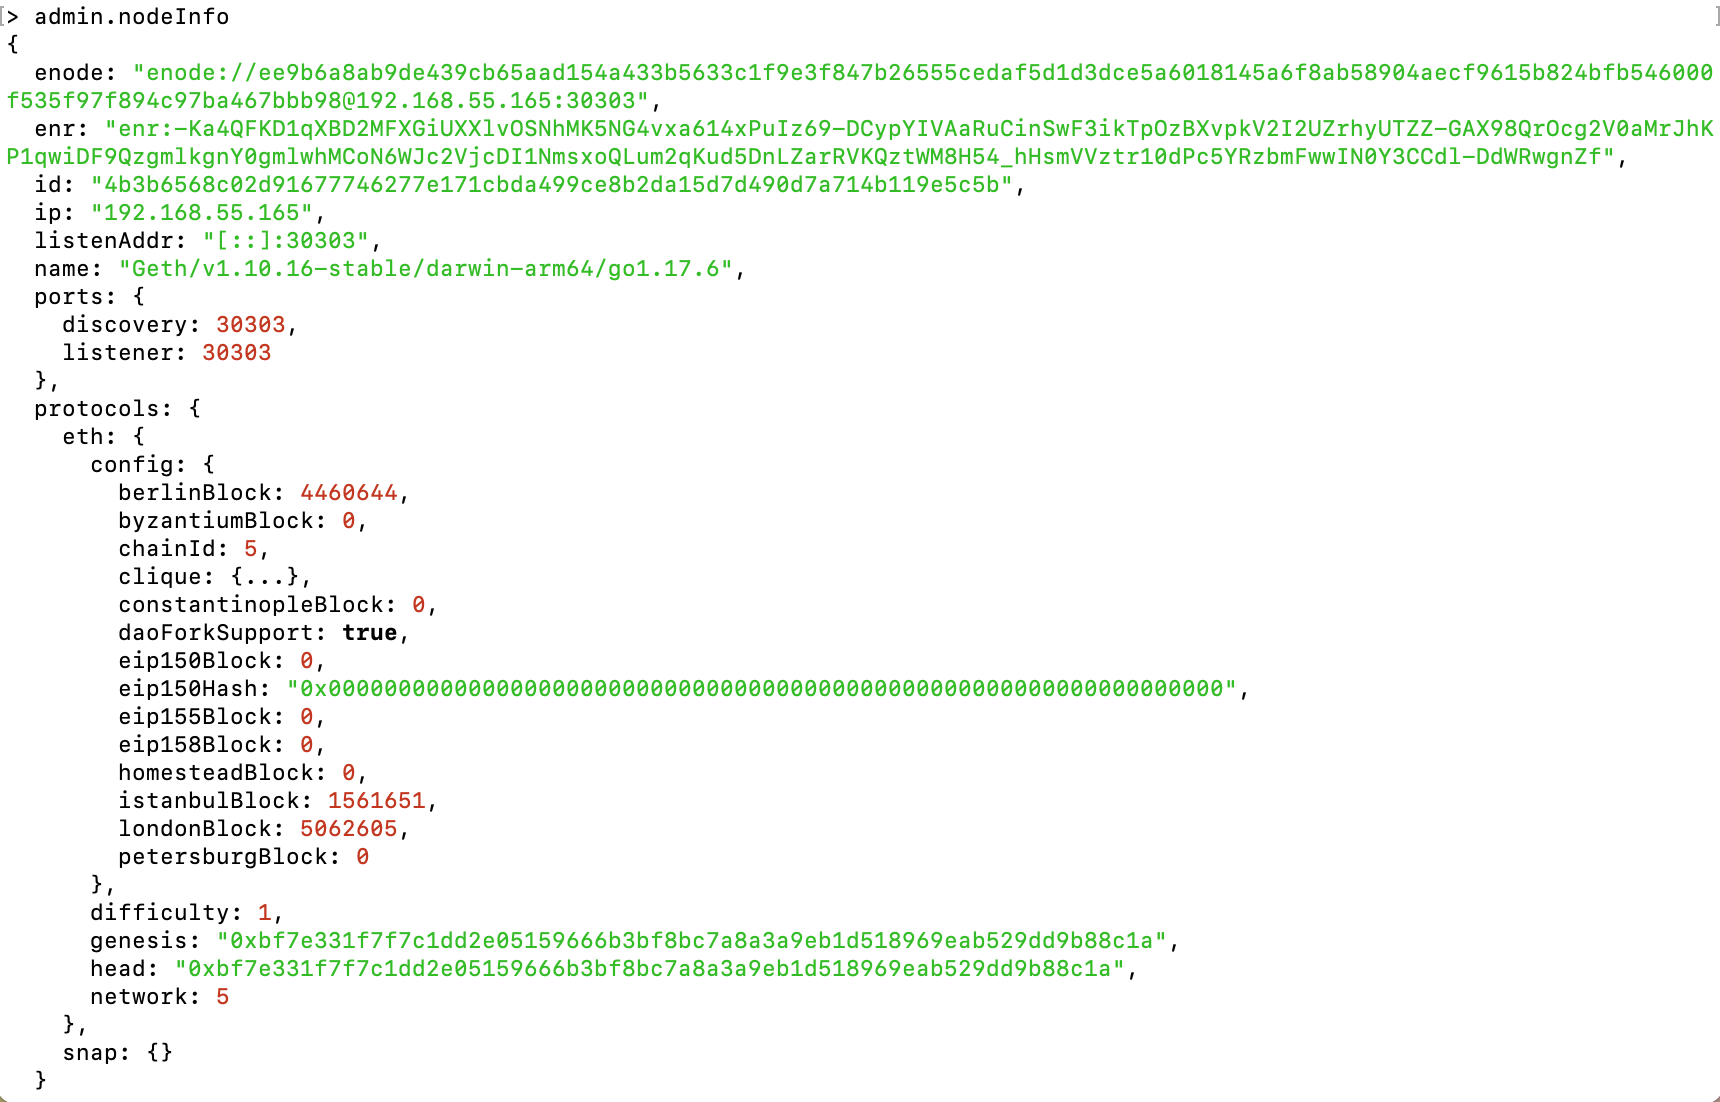

#### [사설망]
private network : 개인이 개설하여 개방이 제한됨
분산원장으로 본래의 목적인 공유가 불가능함 

[DEV Mode]

```python
geth --dev
```

[genesis.json 설정]

In [1]:
%%writefile _genesis.json
{
  "config": {
    "chainId": 33,
    "homesteadBlock": 0,
    "eip150Block": 0,
    "eip155Block": 0,
    "eip158Block": 0
  },
  "nonce": "0x0000000000000033",
  "timestamp": "0x0",
  "parentHash": "0x0000000000000000000000000000000000000000000000000000000000000000",
  "gasLimit": "0x8000000",
  "difficulty": "0x100",
  "mixhash": "0x0000000000000000000000000000000000000000000000000000000000000000",
  "coinbase": "0x3333333333333333333333333333333333333333",
  "alloc": {}
}

Writing _genesis.json


[geth 네트워크 초기화]

init 명령어를 사용하여 genesis.json을 읽어 블록체인을 설정
사설망은 블록체인의 생성뿐 아니라 블록체인이 유통되는 네트워크도 필요함.
=> **_geth_genesis.sh** 파일로 만들어둠
```python
geth --datadir .\eth init _genesis.json
```

[계정 발급]
```pyton
geth --datadir .\eth account new 
```

[사설망 접속]
```python
geth --datadir .\eth --http --http.addr "localhost" --http.corsdomain "*" console
```

사설망 터미널 열어둔채로 다른 터미널 띄우고 
```python
geth attach http://localhost:8445
```
해주면 연동이됨

채굴시작 
miner.start()

채굴종료
miner.stop()

잔액확인
eth.getBalance(eth.accounts[0]);